<h1><center>Capstone Project: Title TBD</center></h1>
<h2><center>Master of Science in Data Science  
    Southern Methodist University</center></h2>

Punchlist of Items:
- Intro/Statement of Work **[CHECK]**
- Data Collection **[CHECK]**
- DailyAggr on raw .csv files **[CHECK]**
- VADER results on daily .csv files (X) **[CHECK]**
- CoinAPI for price data (y) **[CHECK]**
- brief analysis and results (objectivity **[CHECK]**, distributions **[CHECK]**, timeline line chart **[CHECK]**, positive/negative compare **[CHECK]**, confusion matrix?, correlation/hypothesis testing?) 
- CoinAPI (explained, not executed) for historical tweets **[CHECK]**
- brief analysis and results using same methods as prior analysis **[CHECK]**
- Transition shift to googletrends and tweet volume data
- webscrapping programs to gather data from sources listed above
- analysis and results, compared to those generated using Sentiment Analysis

<h3>Introduction</h3>  

Through the craze of cryptocurrency and the uprise of ever-changing data science techniques in the past 2 years, there has been myriad of blog posts, formal publications, and educational studies showing how market changes can be anticipated by leveraging social media posts by way of established natural language processing algorithms.  Many studies vary in both procedural steps taken and home spun programs used to develop results but the same outcomes were held true: the model generalized with a prediction rate greater than 50%, therefore the model retains a slight edge over a coin flip, i.e. 50/50 chance.  
 
While these results may seem significant at face value, it is worth investigating whether the time period in which the studies was a significant driver rather than the models themselves.  The following notebook takes a deeper look into these conclusions through conducting a study from March 2018 to April 2018 where major cryptocurrency prices were shrinking rather than growing.  In addition, a retrospective element was added to the study by sampling social media content during a time period when cryptocurrency prices were growing exponentially, further backing original result findings.

<h3>Statement of Work to Follow</h3>  

The scope of work is laid out in the following format. 

<u><i>Part 1: Sentiment Analysis on Cryptocurrency Tweets to Determine Market Shifts</i></u>

<b>Data Collection</b>  
A python script developed on a local machine and it was executed through the use of the Tweepy package that runs on top of the Twitter API.  Cryptocurrency pricing data was queried through the use of a RESTful application on CoinAPI.io.  

<b>Data Aggregation</b>  
Raw tweet files are gathered and organized to a daily level.  Day, 24 hour time horizon periods, is the basis for all of the analysis that is done throughout the notebook.  

<b>Preprocessing and VADER Sentiment Analysis</b>  
A series of standard tweet text preprocessing is done as well as filtering to only use social media content that has the potential to influence a broader population.  VADER sentiment analysis is then conducted within the natural language processing toolkit, a proven robust algorithm that outputs negative, positive, neutral, and complexity values based on the text given.  

<b>Analysis Results</b>  
The objectivity of the VADER analysis is assessed to determine if twitter is the proper social media platform to gain a holistic understanding of public opinion and objectivity on cryptocurrencies.  Top positive and negative VADER scores are taken to make an aggregated daily score that is compared to cryptocurrency price changes.  These top scores are also compared to determine whether the Twitter community gathers a group consensus on market outlook at any given day.  

<b>Acquiring Supplemental Data for Retrospective Element</b>  
An additional Twitter dataset pertaining to cryptocurrencies is sampled retrospectively through the use of a RESTful application on CoinAPI.io. This time period chosen was during a time when cryptocurrency markets were growing exponentially.  

<b>Supplemental Data Analysis Results</b>  
VADER sentiment analysis is done in the same fashion as the original set to generate the same series of results: determining objectivity, comparing to cryptocurrency market changes, and Twitter community group consensus. 

<u><i>Part 2: Social Media Content Volumes about Cryptocurrencies to Determine Market Shifts</i></u>

<b>Data Collection</b>  
Daily Google trends index values for a 1 year period are gathered to develop an overall internet prescence metric for specific cryptocurrencies.  In addition, daily tweet volumes are gathered for the same time period from BitInfoCharts to determine overall popularity for the same cryptocurrencies on twitter.  

<b>Data Aggregation</b>  
Additional data preparation is done for Google trends index values to normalize the values on a single scale.  

<b>Analysis Results</b>  
The daily metrics are compared to cryptocurrency price changes to determine whether these data sources are more robust in anticipated cryptocurrency markets.

<h3>Data Collection</h3>  

Our main explanatory data source, Twitter, is made accessible through the Twitter API, an application built by Twitter for developers to pull information from Twitter's platform.  Without certain permissions and clearance, it has limited restrictions on the amount of data that can be queried at any given time as well as how often their databases can be queried.  Therefore, our query script is limited 15 requests per 15 minute interval and 100 tweets per request.  

The limits prevent from recovering a complete set of tweets for a given time period so sampling techniques were used to gather social media content.  There were also ways to combate these limitations by using a Twitter Streaming API, however, this was not explored due to the lack of expertise and concerns about data storage limitations.  

The response data source comes from an application provided by CoinAPI.io.  It was chosen for its simplicity for retrieving data and its multi-facet functionality.  The content provided by CoinAPI.io will be leveraged in a few ways over the course of this notebook.  The application follows a RESTful API structure where data is requested through a HTTP request and the text is returned in the given format the API specifies.  

<h4>Twitter API</h4>  

A local python script was strung together and executed on a local machine every 15 minutes while the program was in use.  The cryptocurrencies chosen for collection were Bitcoin and Ethereum, the two largest by market value.  Operating times varied from day to day based on availability.  The local machine also doubled as a personal laptop so there are complications while the machine is in transit without internet or in use for other purposes.  The dataset as a whole is a conveinent sample since data was not formally sampled from a known population making tradional statistical techniques more difficult to implement with the proper levels of certainty.  Tweet volumes gathered may vary but still exceed 20,000 for the majority of the days during the time period of collection.  While smaller compared to overall tweet volumes pertaining to these specific cryptocurrencies, there was still a pseudo-random sampling structure leaving the ability to make a broader generalization.  Precision will not necessarily be critical which will begin to be made clearer as the notebook progresses.  

Full object were not collected.  The script only collected a series of attributes beyond the tweet text itself.  These were the only attributes that were identified as critical that would be used during the course of filtering and analysis.  They are as follows:  
- created_at: tweet post timestamp
- retweet_count: number of retweets for specific tweet
- favorite_count: number of favorites for specific tweet
- source: the means of technology used to generate tweet (i.e. PC, mobile, etc.)

User specific data was also collected including user_followers_count, user_friends_count, and user_location.  
  
Since the script was executed over a long period of time, it will not be executed in this notebook.  For a deeper understanding, please refer to "INSERT FILE NAMES" in the GitHub repository.  Results from the script are stored in "data/csv_dumps/$\lt$cryptocurrency$\gt$".  The raw csv files are not made public due to privacy purposes as they contain Twitter user information and readable text posted by the user.

<h4>Crytocurrency Prices</h4>  

A python script program, "CoinAPI.py", was made specifically for ease interacting with the CoinAPI.io RESTful application during the course of this study.  It contains functionality beyond historical price querying which will be explored later on.  For now, the script is implemented to gather daily OHLCV (Open, High, Low, Close, Volume) data about our chosen cryptocurrencies, Bitcoin and Ethereum.  It is executed below and saved in "data/price_data".  For more information about the python script itself please refer to "CoinAPI.py" 

In [6]:
%run -i 'CoinAPI.py'

In [7]:
api = CoinAPI('XXXXXXXX-XXXX-XXXX-XXXX-XXXXXXXXXXXX')
time_start = '2017-01-01T00:00:00'
time_end = '2018-05-01T00:00:00'

filename = 'BTC_price_20170101_20180501.txt'
symbol_id = 'BITSTAMP_SPOT_BTC_USD'
price_data_BTC = api.getHistOHLCV(symbol_id=symbol_id, time_start=time_start, time_end=time_end, limit=600)
api._writeHistOHLCV(filename, price_data_BTC)

filename = 'ETH_price_20170101_20180501.txt'
symbol_id = 'BITSTAMP_SPOT_ETH_USD'
price_data_ETH = api.getHistOHLCV(symbol_id=symbol_id, time_start=time_start, time_end=time_end, limit=600)
api._writeHistOHLCV(filename, price_data_ETH)

ConnectionError: HTTPSConnectionPool(host='rest.coinapi.io', port=443): Max retries exceeded with url: /v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?period_id=1DAY&time_start=2017-01-01T00:00:00&time_end=2018-05-01T00:00:00&limit=600 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1087f1450>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

<h3> Data Aggregation </h3>  

Once raw tweet information is collected, a python script was built to aggregate csv files into a single csv file for each day (24 hour period), the desired time horizon for evaluation.  It is executed below and saved in "data/csv_daily/$\lt$cryptocurrency$\gt$".  For more information about the script itself, please refer to "DailyAggr.py" 

In [1]:
%run -i 'DailyAggr.py'

<h3> Preprocessing and VADER Sentiment Analysis </h3>  

Preprocessing and VADER Sentiment Analysis is done in a single python script called "Sentiment_VADER.py".  The preprocessing steps taken are as follows:
- cross-check to ensure that the cryptocurrency is noting in the tweet text
- remove tweets by users with less than 100 followers to ignore uninfluential social media content
- remove URL likes (i.e. bit.ly/xxxxx)
- remove user mentions (i.e. @twitter_user)
- remove the hashtag, "#", symbol but not the words themselves
- remove question marks, "?", the symbol generated during encoding mismatches  

The preprocessing python package was used during the text preprocessing stages.

After preprocessing, VADER Sentiment scores are generated using the polarity_scores function within the SentimentIntensityAnalyzer within the natural language toolkit (nltk) python package.  The function leverages VADER (Valence Aware Dictionary and sEntiment Reasoner) where text is tokenized and each word is rated a polarity score (positive/negative/neutral).  The whole text is algorithmically aggregated to single positive, negative, and neutral values.  A complexity score is also generated based on conflicting positive/negative words in a single line of text, making it more difficult to pick up on overall sentiment.  

Each tweet was run through this process to generate sentiment scores for each day and saved in a csv file in the same fashion as the "DailyAggr.py" script.  However, the results are saved in "data/VADER/csv_daily/$\lt$cryptocurrency$\gt$".  For more information about the script itself, please refer to "Sentiment_VADER.py"  

In [1]:
%run -i 'Sentiment_VADER.py'

/Users/JackNelson/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
sentiment_BTC = DailySentiment('Bitcoin', 'csv_daily')
sentiment_BTC.compileSentiments()

sentiment_ETH = DailySentiment('ETH', 'csv_daily')
sentiment_ETH.compileSentiments()

/Users/JackNelson/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,4,5,7,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<h3>Analysis Results</h3>  

For analysis interpretation, each csv file for each cryptocurrency needs to be concatenated with it's own identifier field called "date" into a single dataframe.  This is done through a python script called "DataAggr.py".  The fetchSentiment() function will be used to retreive and compile VADER results into a single dataframe for both Bitcoin and Ethereum.  For more information about the script itself, please refer to "DataAggr.py"

In [3]:
%run -i 'DataAggr.py'

In [6]:
df_BTC = fetchSentiments("csv_daily","Bitcoin")

df_ETH = fetchSentiments("csv_daily","ETH")

All plots done in the Analysis Results section are done through the use of a python script called "PlotsSuite.py". It is specifically tailored to this study.  For more information about the script itself, please refer to "PlotsSuite.py".

In [25]:
%run -i 'PlotsSuite.py'

<h4>Non-Objective Sentiments</h4>  

There were a large population of tweet gathered where no polarity sentiment, positive or negative, could be extracted from the text.  A percentage of tweets that resulted with a neutral value of 1.0 and positive/negative values of 0.0 are plotted below using PlotsSuites.py's objectivePercent() function. 

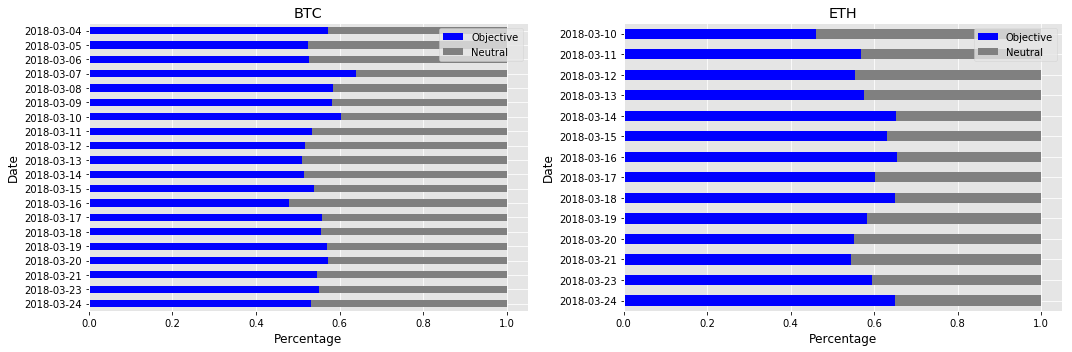

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
objectivePercent(df_BTC, ax1, title='BTC')
objectivePercent(df_ETH, ax2, title='ETH')

plt.savefig('figures/objectivePercent.png', bbox_inches='tight')

Right off the bat, we see that roughly 30%-40% of all tweets gathered could get a polarity sentiment using VADER.  Upon further investigation, we see that VADER is correctly classifying polarity scores.  Much of the tweets resulting in neutral values of 1.0 are bots, give-aways, and price updates, mostly conveying information but not giving off much feeling based on text wording. 

In [11]:
#insert a couple tweet examples of neutral values of 1.0

<h4> Comparing Sentiment Score Distributions for Objective Results </h4>  

To see the intensity of polarity amongst tweets with objective VADER results, first the original dataframe is filtered to remove results with a neutral VADER score of 1.0.  Next, the getPolarity() function within "DataAggr.py" is used to generate a new dataframe that classifies results as positive/negative by taking the larger of the two sentiment values.  The neutral values from the first dataframe, and the absolute value of the higher sentiment values from the second dataframe are plotted as beta distributions using the objectiveDistribution() function from "PlotsSuite.py" 

In [14]:
df_obj_BTC = df_BTC[df_BTC.neu != 1]
df_polar_BTC = getPolarity(df_obj_BTC)

df_obj_ETH = df_ETH[df_ETH.neu != 1]
df_polar_ETH = getPolarity(df_obj_ETH)

/Users/JackNelson/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/JackNelson/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


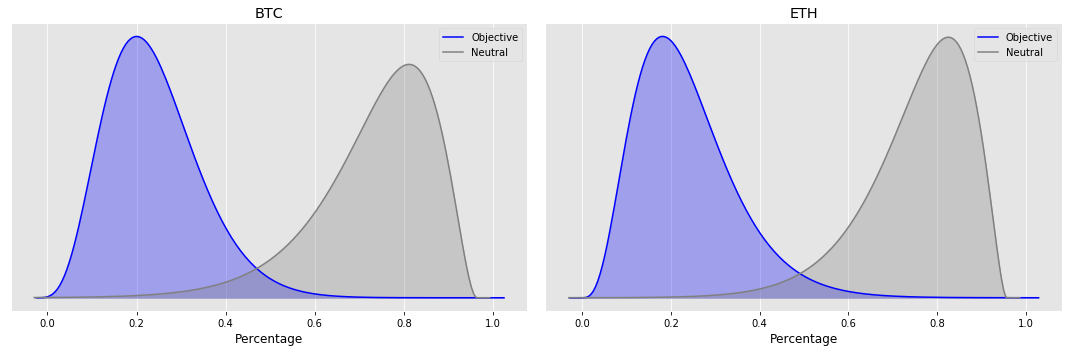

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
objectiveDistribution(df_obj_BTC, df_polar_BTC, ax1, title='BTC')
objectiveDistribution(df_obj_ETH, df_polar_ETH, ax2, title='ETH')

plt.savefig('figures/objectiveDistribution.png', bbox_inches='tight')

We see that the distributions revolve around vastly different means.  Even if a tweet yields an objective VADER sentiment score, we observe that these scores are relatively small when compared to the neutral scores generated on the same set of tweets.

<h4> Daily Sentiment and Cryptocurrency Price Change </h4>  

Pricing data is gathered to compare to what little sentiment can be extracted.  The cryptocurrency price data is read in from "data/price/$\lt$cryptocurrency$\gt$" and the price change measure over the course of the day, closing price minus opening price, is made using the getPriceDiff() function from "DataAggr.py". After, it is joined based on date to the average daily polarity sentiment value, a grouped average over all objective tweets collected on that given day.  The two measures are compared by plotting them on a dual y axis time series plot to observe if there is any noticable correlation between the two separate data sources.  The plot is made using the dailyPriceSentimentChart() function in "PlotsSuite.py".

In [18]:
price_data_BTC = pd.read_csv('data/price_data/BTC_price_20170101_20180501.txt')
price_flux_BTC = getPriceDiff(price_data_BTC)

dailyCompare_BTC = pd.DataFrame({'value':df_polar_BTC.groupby(['date'])['value'].mean()}
                            ).reset_index().join(price_flux_BTC.set_index('date'), on='date')

price_data_ETH = pd.read_csv('data/price_data/ETH_price_20170101_20180501.txt')
price_flux_ETH = getPriceDiff(price_data_ETH)

dailyCompare_ETH = pd.DataFrame({'value':df_polar_ETH.groupby(['date'])['value'].mean()}
                            ).reset_index().join(price_flux_ETH.set_index('date'), on='date')

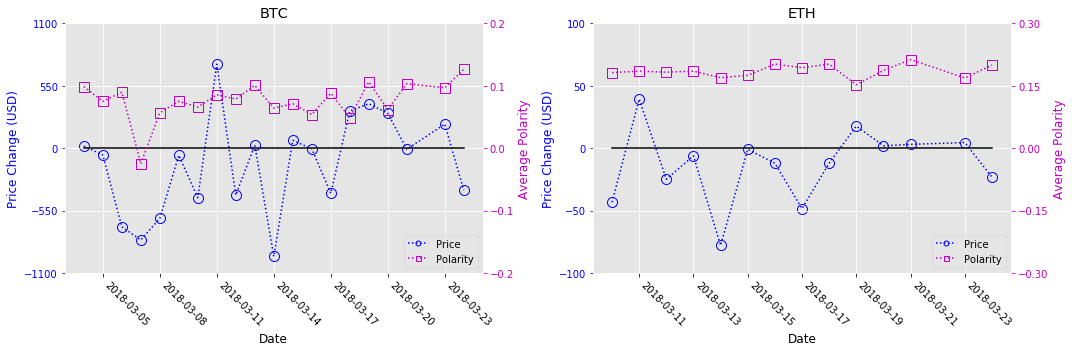

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
dailyPriceSentimentChart(dailyCompare_BTC, ax=ax1, title='BTC')
dailyPriceSentimentChart(dailyCompare_ETH, ax=ax2, title='ETH')

plt.savefig('figures/dailyPriceSentiment.png', bbox_inches='tight')

The daily sentiment appears to be relatively flat for both cryptocurrencies with a bias towards positivity, while price differences look to be more spuratic, bouncing between gains and losses.  In both cases, more losses than gains.  The consistency in positive sentiment puts into question its ability to anticipate market changes. 

<h4> Overall Polarity Sentiment Consensus </h4>  

The biased positive sentiment results can be a product of different distributions between positive and negative tweets or by shear volume, more positive tweets than negative tweets.  A disparity between positive and negative distributions would indicate a general consensus by the Twitter community.  Positive and negative sentiments are plotted in side-by-side boxplots by day to see if there is any disparity between sentiment values on any given day.  The total volumes of positive and negative tweets by day are plotted on side-by-side bar plots below on the same x axis time scale.  Both plots are made using the dailySentimentOverview() function in "PlotsSuite.py"

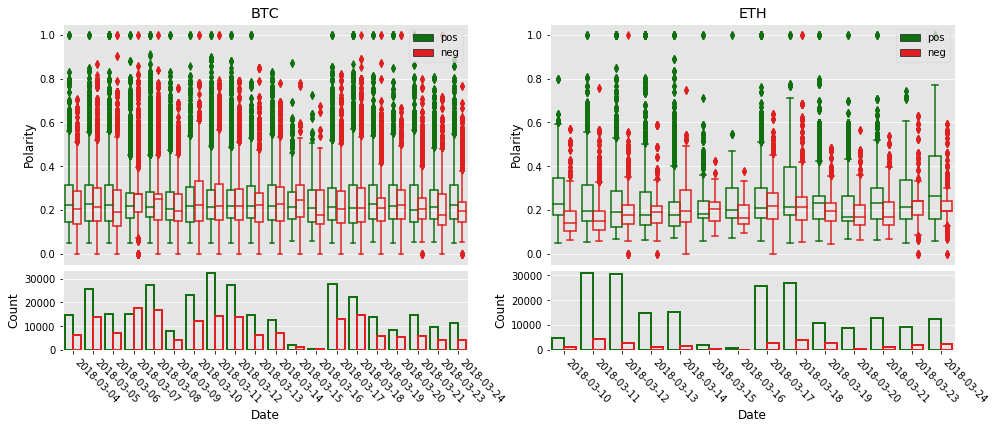

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', figsize=(16,6), gridspec_kw={'height_ratios':[3,1]})
dailySentimentsOverview(df_polar_BTC, ax1=ax1, ax2=ax3, title='BTC')
dailySentimentsOverview(df_polar_ETH, ax1=ax2, ax2=ax4, title='ETH')

plt.savefig('figures/dailySentimentOverview.png', bbox_inches='tight')

Through the plots, we observe that most days there was no sentiment polarity gap between positive and negative tweets.  Mean intensity stays relatively constant at 0.2, consistent with the objectivity distribution in a previous plot.  Rather, there are a higher volume of positive tweets than negative.  This leaves the question if sentiment analysis is a robust predictor to market fluctuations for cryptocurrencies.  On the surface it appears if you tweet about a cryptocurrency, more likely than not it will carry a positive sentiment. 

<h3> Aquiring Supplemental Dataset using CoinAPI.io </h3>  

To further back our findings, we will need to conduct the same study in a time when these same cryptocurrencies were growing in values rather than shrinking.  Consistent results will show that the content of the tweets themselves is not a robust predictor because the social media platform from which sentiment was determined is bias towards viewing cryptocurrencies in a positive light.  

Twitter has a restriction of 7 days on how far back applications can query tweets using the REST API.  In order to gather data, CoinAPI.io's RESTful application had to be used.  CoinAPI.io has a repository of historical tweets pertaining to cryptocurrencies markets.  Since CoinAPI restricts requests at 100 per 24 hour time period where each request is capped at 100 response records, a sampling technique was implemented.  

From November 2017 to December 2017, 100 tweets where sampled from every hour in a given day.  This systematic approach allows us to randomly view a sample of sentiment over the entire course of the day.  Samples were aggregated to the day level, as was done to the original dataset.  Sample sizes were capped at 2400 tweets.  Even though the sample is relatively small compared to its population, the sample size should still show an accurate representation of the population given the samples were randomly chosen.  

Samples were done over an extended period of time using the "CoinAPI_dailyTweetPull.ipynb".  The .txt files were saved under "data/coin_tweets/".  Since only the text was saved rather than the entire tweet object and the samples came from a population discussing cryptocurrency in general rather than one specific cryptocurrency, different filtering techniques were implemented.  

<h3> VADER Sentiment/Polarity Analysis on New Dataset</h3>  

First, it is assumed CoinAPI filtered non-influential tweets where users had very few follower, similar to the 100 followers threshold implemented in the original dataset.  Second, each sample had to be converted to the English language if it a different language was indicated.  There was no way to sampling in a fashion where only English encoded tweets were sampled as was done in the original dataset.  Lastly, a keyword filter had to be used on the samples to only analyze tweets where that specific cryptocurrency was mentioned.  All other text preprocessing was done in the same fashion as before.  

VADER scores are generated using the compileSentiments() function within the DailySentiment module within "Sentiment_VADER.py". 

In [27]:
sentiment_BTC = DailySentiment('Bitcoin', 'coin_tweets')
sentiment_BTC.compileSentiments()

sentiment_ETH = DailySentiment('ETH', 'coin_tweets')
sentiment_ETH.compileSentiments()

<h3>Analysis of New Sentiments to Predict Price</h3>  

As performed before, a single dataframe for each cryptocurrency is made by concatenating .txt files and adding an identifier field called "date".  Files are taken from "data/VADER/coin_tweets/$\lt$cryptocurrency$\gt$" using the fetchSentiment() function from "DataAggr.py" for both Bitcoin and Ethereum. 

In [28]:
df_BTC2 = fetchSentiments("coin_tweets","Bitcoin")

df_ETH2 = fetchSentiments("coin_tweets","ETH")

<h4>Non-Objective Sentiments</h4> 

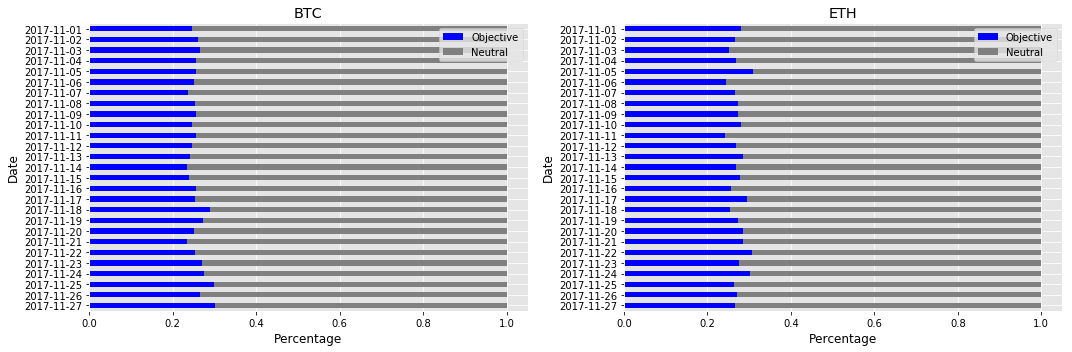

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
objectivePercent(df_BTC2, ax1, title='BTC')
objectivePercent(df_ETH2, ax2, title='ETH')

plt.savefig('figures/objectivePercent2.png', bbox_inches='tight')

Even less tweets are viewed as objective in the CoinAPI.io sample.  It would require further investigation but since these tweets come from a formal application, there may be more tweets gathered giving updates on the market rather than an opinion.  In addition, some tweets had to be translated into english.  A language barrier could prevent VADER from determining sentiment depending on the robustness of the translator.

<h4> Comparing Sentiment Score Distributions for Objective Results </h4>  


Removing neutral tweets and taking top polarity scores and their classification using getPolarity() within "DataAggr.py".

In [30]:
df_obj_BTC2 = df_BTC2[df_BTC2.neu != 1]
df_polar_BTC2 = getPolarity(df_obj_BTC2)

df_obj_ETH2 = df_ETH2[df_ETH2.neu != 1]
df_polar_ETH2 = getPolarity(df_obj_ETH2)

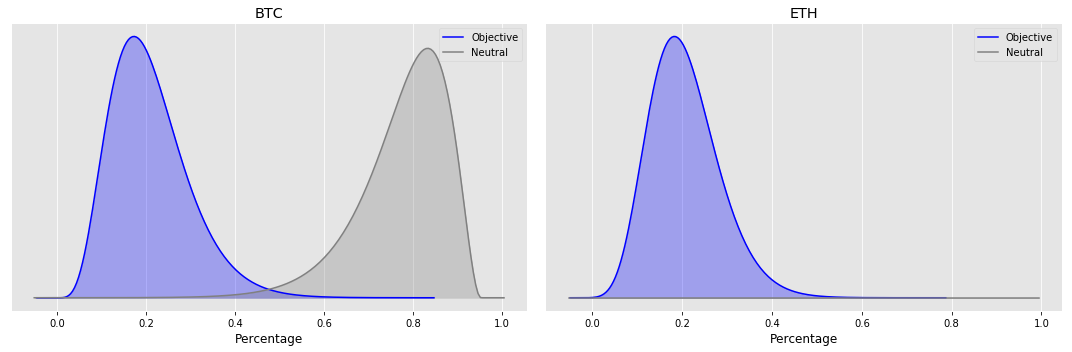

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
objectiveDistribution(df_obj_BTC2, df_polar_BTC2, ax1, title='BTC')
objectiveDistribution(df_obj_ETH2, df_polar_ETH2, ax2, title='ETH')

plt.savefig('figures/objectiveDistribution2.png', bbox_inches='tight')

<h4> Daily Sentiment and Cryptocurrency Price Change </h4>

In [41]:
dailyCompare_BTC2 = pd.DataFrame({'value':df_polar_BTC2.groupby(['date'])['value'].mean()}
                            ).reset_index().join(price_flux_BTC.set_index('date'), on='date')

dailyCompare_ETH2 = pd.DataFrame({'value':df_polar_ETH2.groupby(['date'])['value'].mean()}
                            ).reset_index().join(price_flux_ETH.set_index('date'), on='date')

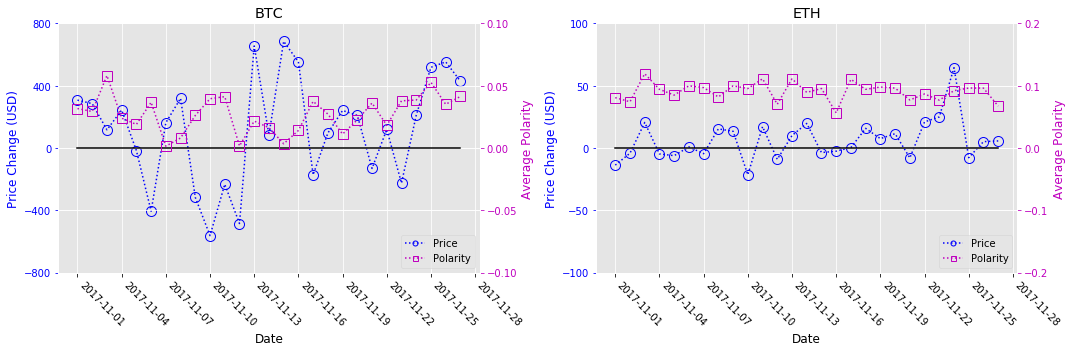

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
dailyPriceSentimentChart(dailyCompare_BTC2, ax=ax1, title='BTC')
dailyPriceSentimentChart(dailyCompare_ETH2, ax=ax2, title='ETH')

plt.savefig('figures/dailyPriceSentiment2.png', bbox_inches='tight')

<h4> Overall Polarity Sentiment Consensus </h4>

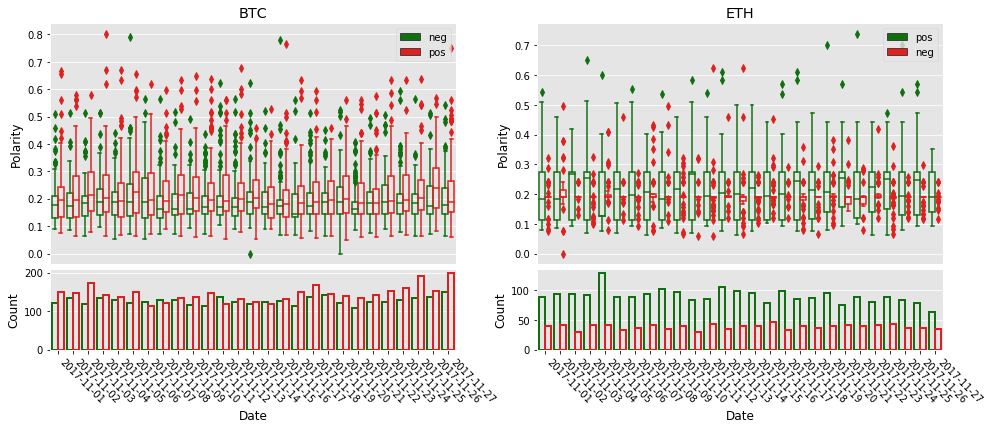

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', figsize=(16,6), gridspec_kw={'height_ratios':[3,1]})
dailySentimentsOverview(df_polar_BTC2, ax1=ax1, ax2=ax3, title='BTC')
dailySentimentsOverview(df_polar_ETH2, ax1=ax2, ax2=ax4, title='ETH')

plt.savefig('figures/dailySentimentOverview2.png', bbox_inches='tight')

<h3> Gathering and Normalizing GoogleTrends data </h3>

In [2]:
# TBD will fill in later

<h3> Gathering Tweet Volumes via BitInfoCharts</h3>

In [4]:
# TBD will fill in later

<h3> Analysis of Internet Popularity to Predict Price </h3>

In [5]:
# TBD will fill in later

<h3> Conclusions </h3>

In [ ]:
# TBD will fill in later